# Medical Insurance Cost Prediction

<h1> Import Necssaries Libraries </h1>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

<h1> EDA </h1>

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(f"data has {df.shape[0]} rows and {df.shape[1]} columns")

data has 1338 rows and 7 columns


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [12]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [13]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

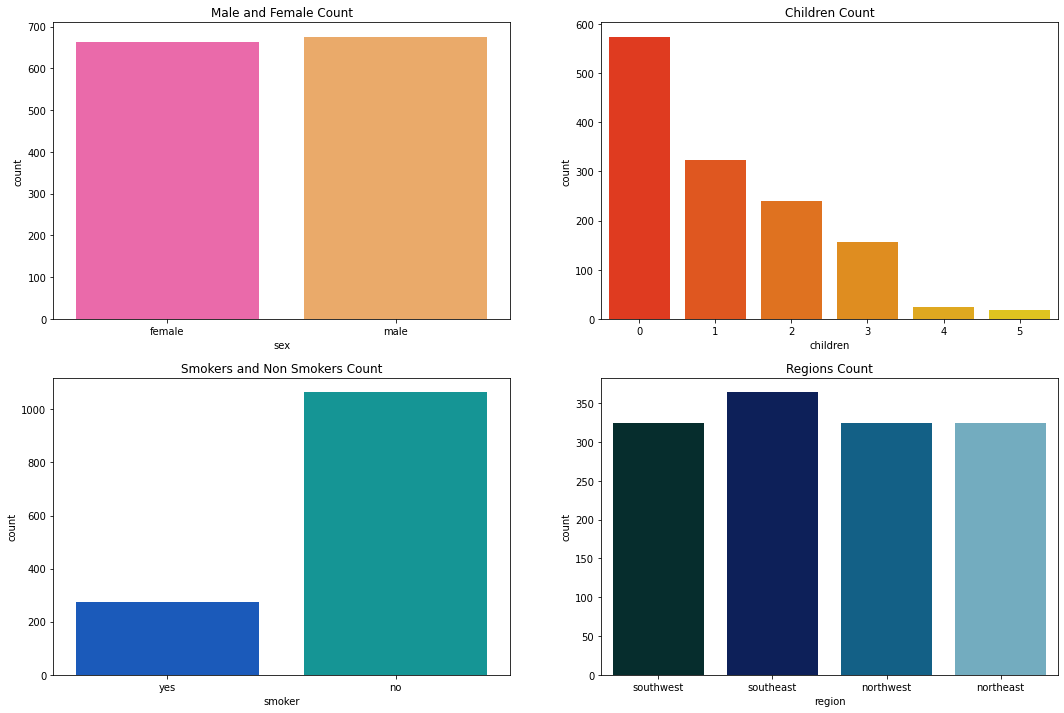

In [14]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Male and Female Count")
sns.countplot(x='sex', data=df, palette='spring');

plt.subplot(2,2,2)
plt.title("Children Count")
sns.countplot(x='children', data=df, palette='autumn');

plt.subplot(2,2,3)
plt.title("Smokers and Non Smokers Count")
sns.countplot(x='smoker', data=df, palette='winter');

plt.subplot(2,2,4)
plt.title("Regions Count")
sns.countplot(x='region', data=df, palette='ocean');

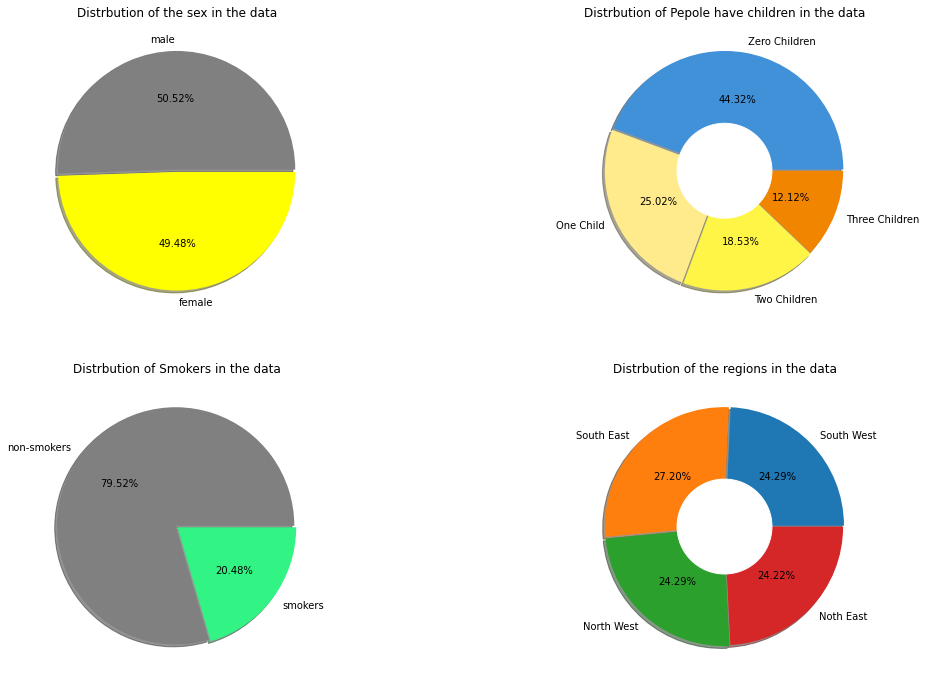

In [15]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Distrbution of the sex in the data")
male = df.sex[df.sex == 'male'].count()
female = df.sex[df.sex == 'female'].count()
plt.pie([male, female], labels=['male', 'female'], autopct="%.2f%%", explode=[0.01,0.01], shadow=True, colors=['grey', 'yellow'])

plt.subplot(2,2,2)
plt.title("Distrbution of Pepole have children in the data")
zero_children = df.children[df.children == 0].count()
one_children = df.children[df.children == 1].count()
two_children = df.children[df.children == 2].count()
three_children = df.children[df.children == 3].count()
size=[zero_children, one_children, two_children, three_children]
my_circle = plt.Circle( (0,0), 0.4, color='white')
labels = ['Zero Children', 'One Child', 'Two Children', 'Three Children']
plt.pie(size, labels=labels, autopct="%.2f%%", explode=[0.01,0.01, 0.01, 0], shadow=True, colors=['#4191d9', '#ffeb8c', '#fff547', '#f28500'])
plt.gcf().gca().add_artist(my_circle)

plt.subplot(2,2,3)
plt.title("Distrbution of Smokers in the data")
no_smokers = df.smoker[df.smoker == 'no'].count()
yes_smokers = df.smoker[df.smoker == 'yes'].count()
plt.pie([no_smokers, yes_smokers], labels=['non-smokers', 'smokers'], autopct="%.2f%%", explode=[0.01,0.01], shadow=True, colors=['grey', '#31f484'])

plt.subplot(2,2,4)
plt.title('Distrbution of the regions in the data')
southwest = df.region[df.region == 'southwest'].count()
southeast = df.region[df.region == 'southeast'].count()
northwest = df.region[df.region == 'northwest'].count()
northeast = df.region[df.region == 'northeast'].count()

size_2 = [southwest, southeast, northwest, northeast]
labels_2 = ['South West', 'South East', 'North West', 'Noth East']
my_circle2 = plt.Circle( (0,0), 0.4, color='white')
plt.pie(size_2, labels=labels_2, autopct="%.2f%%", explode=[0.01,0.01, 0.01, 0], shadow=True)
plt.gcf().gca().add_artist(my_circle2)

plt.show()

non-smokers and pepole with no childern have the majority in the dataset<br>
sex and regions are pretty equal

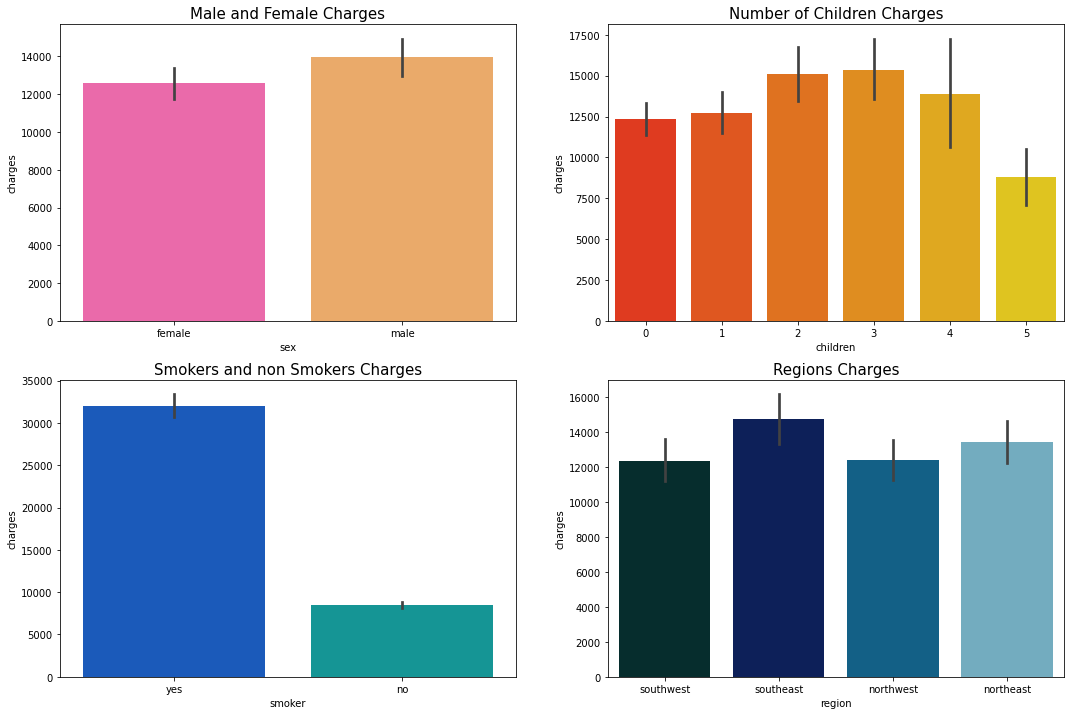

In [16]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
plt.title("Male and Female Charges", {'fontsize' : '15'})
sns.barplot(x='sex', y='charges', data=df, palette='spring');

plt.subplot(2,2,2)
plt.title("Number of Children Charges", {'fontsize' : '15'})
sns.barplot(x='children', y='charges', data=df, palette='autumn')

plt.subplot(2,2,3)
plt.title("Smokers and non Smokers Charges", {'fontsize' : '15'})
sns.barplot(x='smoker', y='charges', data=df, palette='winter')

plt.subplot(2,2,4)
plt.title("Regions Charges", {'fontsize' : '15'})
sns.barplot(x='region', y='charges', data=df, palette='ocean');

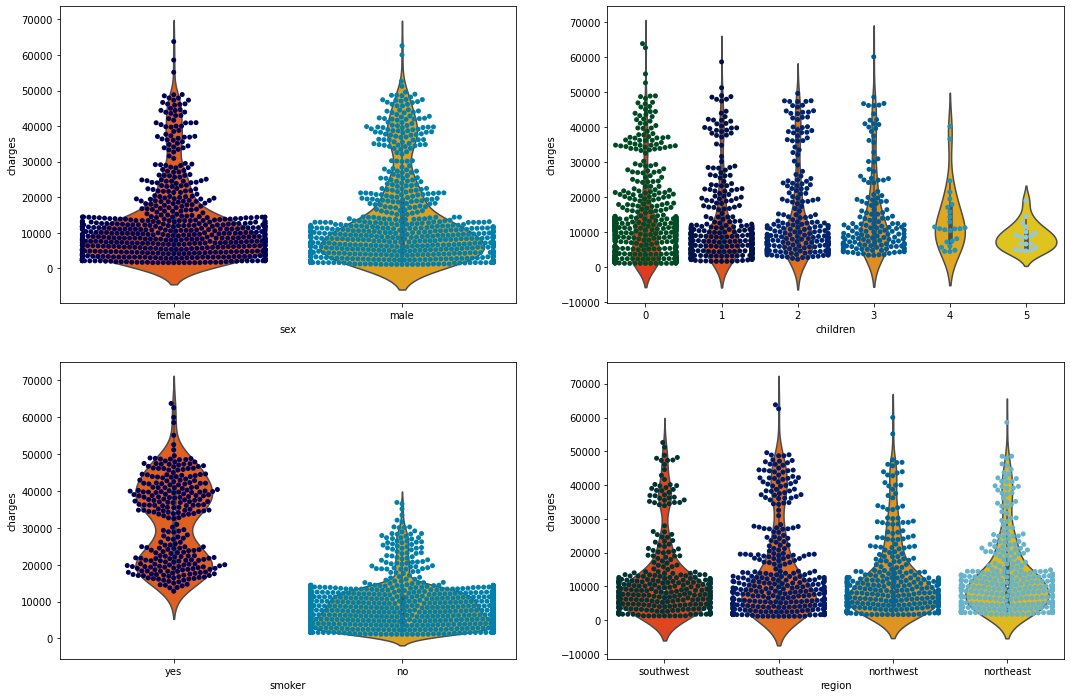

In [17]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.violinplot(x='sex', y='charges', data=df, palette='autumn');
sns.swarmplot(x='sex', y='charges', data=df, palette='ocean');

plt.subplot(2,2,2)
sns.violinplot(x='children', y='charges', data=df, palette='autumn');
sns.swarmplot(x='children', y='charges', data=df, palette='ocean');


plt.subplot(2,2,3)
sns.violinplot(x='smoker', y='charges', data=df, palette='autumn');
sns.swarmplot(x='smoker', y='charges', data=df, palette='ocean');

plt.subplot(2,2,4)
sns.violinplot(x='region', y='charges', data=df, palette='autumn');
sns.swarmplot(x='region', y='charges', data=df, palette='ocean');

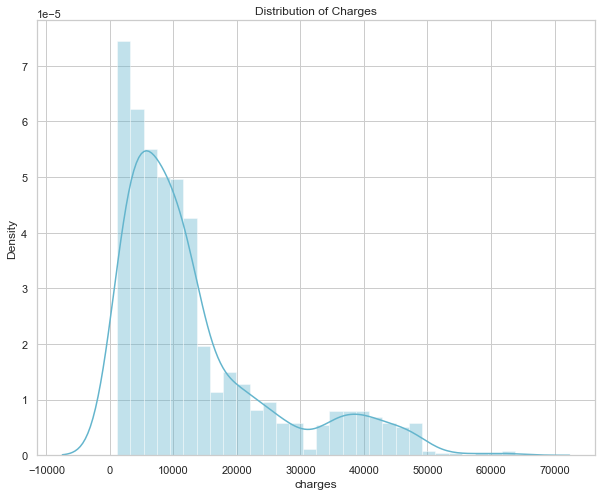

In [18]:
plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
plt.title('Distribution of Charges')
sns.distplot(df['charges'], kde = True, color = 'c')
plt.show()

This distribution is right-skewed. To make it closer to normal we can apply natural log



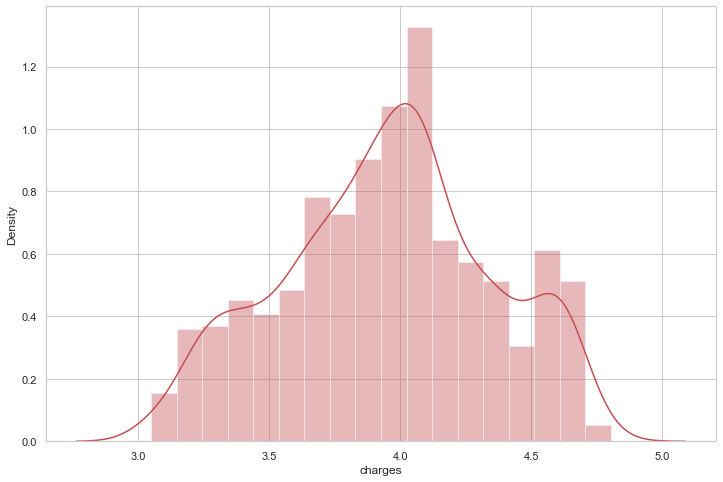

In [19]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

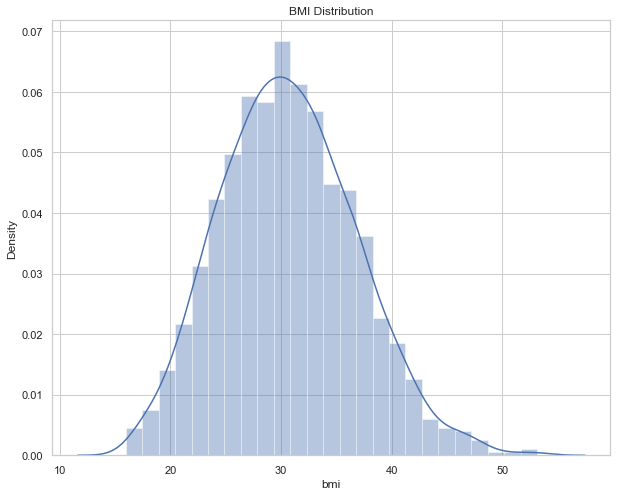

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()

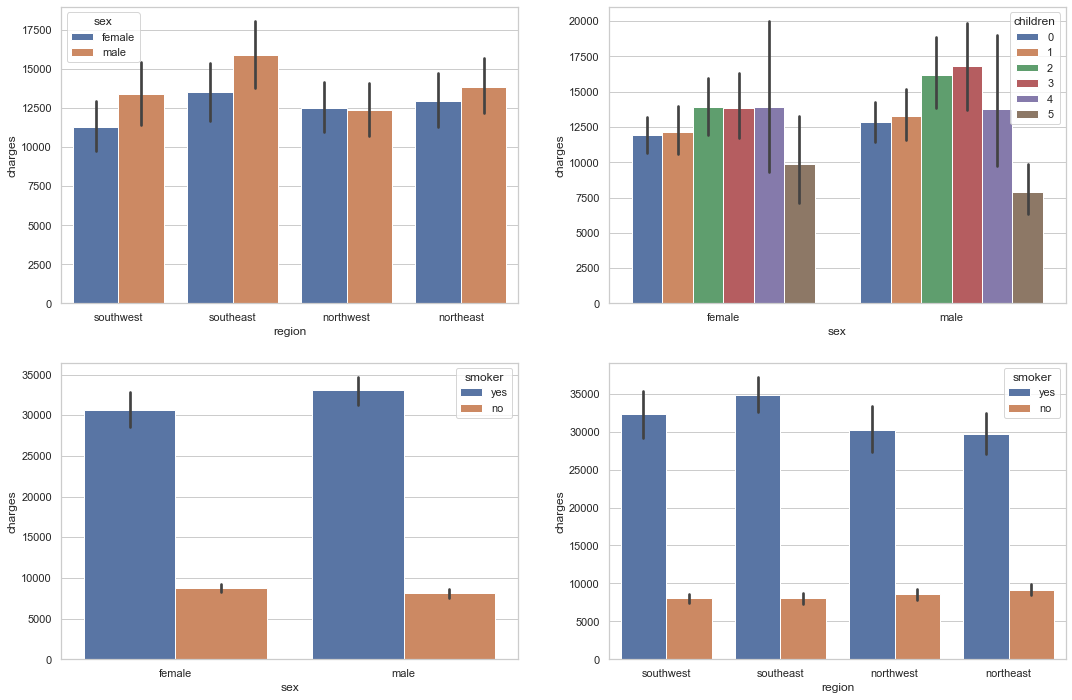

In [21]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.barplot(x='region', y='charges', hue='sex', data=df)

plt.subplot(2,2,2)
sns.barplot(x='sex', y='charges', hue='children', data=df)

plt.subplot(2,2,3)
sns.barplot(x='sex', y='charges', hue='smoker', data=df)

plt.subplot(2,2,4)
sns.barplot(x='region', y='charges', hue='smoker', data=df);

southeast males pays more charges<br>
males with 2,3 childrens pays more charges<br>
smokers clearly pay ways more than non smokers<br>
southeast smokers pays the most

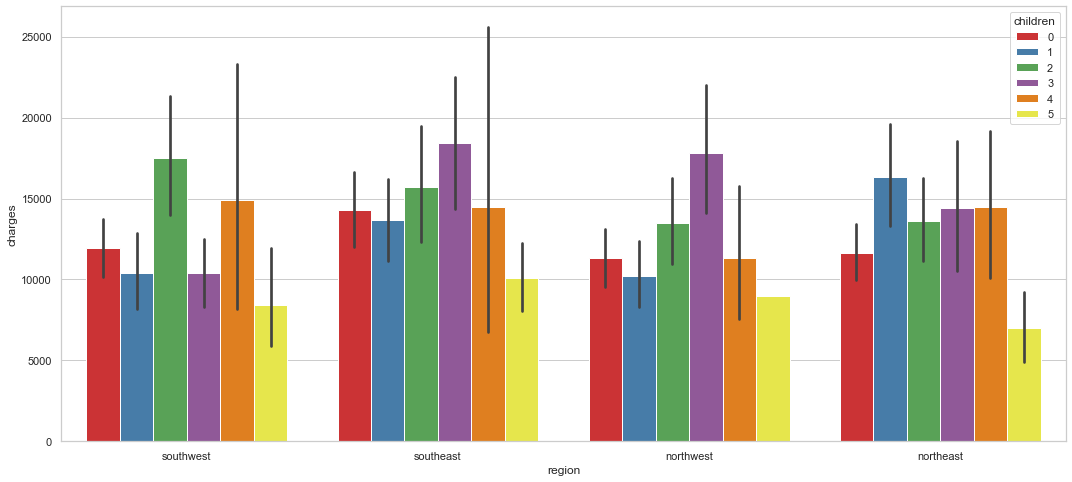

In [22]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well

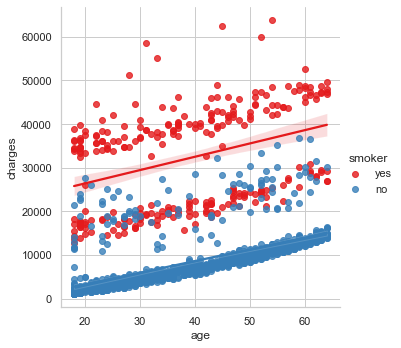

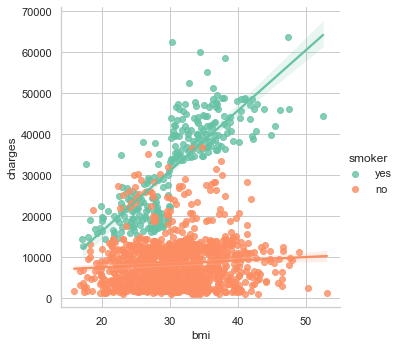

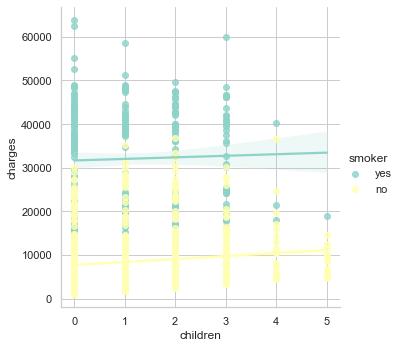

In [23]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3');

<AxesSubplot:xlabel='charges'>

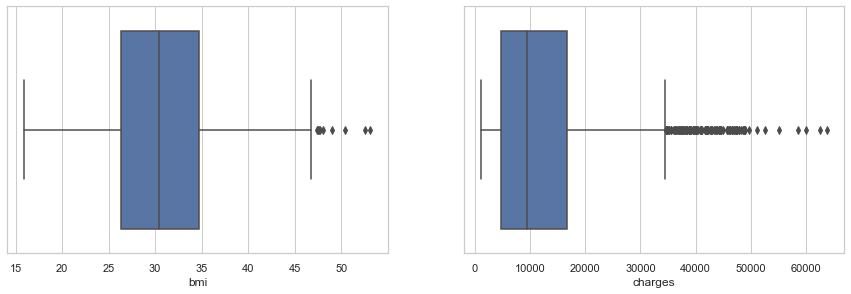

In [24]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(x='bmi', data=df)

plt.subplot(2,2,2)
sns.boxplot(x='charges', data=df)

Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less

# One Hot Encoding

In [25]:
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True)
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Feature Engineering

In [26]:
FEATURES = [col for col in df2.columns if col not in ['charges']]
FEATURES

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [27]:
df2["mean"] = df2[FEATURES].mean(axis=1)
df2["std"] = df2[FEATURES].std(axis=1)
df2["min"] = df2[FEATURES].min(axis=1)
df2["max"] = df2[FEATURES].max(axis=1)
FEATURES.extend(['mean', 'std', 'min', 'max'])

In [28]:
df2.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,mean,std,min,max
0,19,27.900,0,16884.92400,0,1,0,0,1,6.112500,10.970797,0.0,27.90
1,18,33.770,1,1725.55230,1,0,0,1,0,6.846250,12.492534,0.0,33.77
2,28,33.000,3,4449.46200,1,0,0,1,0,8.250000,13.833190,0.0,33.00
3,33,22.705,0,21984.47061,1,0,1,0,0,7.213125,13.039959,0.0,33.00
4,32,28.880,0,3866.85520,1,0,1,0,0,7.860000,13.968422,0.0,32.00


In [29]:
FEATURES

['age',
 'bmi',
 'children',
 'sex_male',
 'smoker_yes',
 'region_northwest',
 'region_southeast',
 'region_southwest',
 'mean',
 'std',
 'min',
 'max']

# Assign Feature and target variables

In [30]:
X = df2.drop('charges', axis=1)
y = df2.charges
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,mean,std,min,max
0,19,27.900,0,0,1,0,0,1,6.112500,10.970797,0.0,27.90
1,18,33.770,1,1,0,0,1,0,6.846250,12.492534,0.0,33.77
2,28,33.000,3,1,0,0,1,0,8.250000,13.833190,0.0,33.00
3,33,22.705,0,1,0,1,0,0,7.213125,13.039959,0.0,33.00
4,32,28.880,0,1,0,1,0,0,7.860000,13.968422,0.0,32.00


# Spliting Data into Training and Testing data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Modeling

In [32]:
def kfolds(model, model_name):
    model = cross_val_score(model, X,y, cv=10)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")

def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%")
    
def save(model, model_name):
    joblib.dump(model, model_name)
    print("Model Saved Succesfully")
    

## Random Forest Regressor

In [33]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state=10) 
kfolds(rf_model, "Random Forest")
train(rf_model, "Random Forest")
r2(rf_model, "Random Forest")

Random Forest score on cross validation: 83.64966352368%
Random Forest model score on Training data: 97.54689847160938%
Random Forest model score on Testing data: 87.8044728690866%
R2 Score for Random Forest is 87.8044728690866%


## Gradient Boosting Regressor

In [34]:
gbr = GradientBoostingRegressor(n_estimators=40)
kfolds(gbr, "Gradient Boosting")
train(gbr, "Gradient Boosting")
r2(gbr, "Gradient Boosting")

Gradient Boosting score on cross validation: 85.8867952656885%
Gradient Boosting model score on Training data: 87.56971335340222%
Gradient Boosting model score on Testing data: 90.32560754062547%
R2 Score for Gradient Boosting is 90.32560754062547%


## Bagging Regressor

In [35]:
br = BaggingRegressor(n_estimators=70, random_state=10)
kfolds(br, "Bagging")
train(br, "Bagging")
r2(br, "Bagging")

Bagging score on cross validation: 83.64029867063427%
Bagging model score on Training data: 97.5188435110028%
Bagging model score on Testing data: 87.8181893771668%
R2 Score for Bagging is 87.8181893771668%


## Linear Regression 

In [36]:
lr = LinearRegression()
kfolds(lr, "Linear Regression")
train(lr, "Linear Regression")
r2(lr, "Linear Regression")

Linear Regression score on cross validation: 74.45419594396432%
Linear Regression model score on Training data: 73.44150173746569%
Linear Regression model score on Testing data: 79.67931786095922%
R2 Score for Linear Regression is 79.67931786095922%



## Decision Tree Regressor

In [37]:
dtr = DecisionTreeRegressor(criterion='poisson', random_state=10)
kfolds(dtr, "Decision Tree")
train(dtr, "Decision Tree")
r2(dtr, "Decision Tree")

Decision Tree score on cross validation: 66.62918123556328%
Decision Tree model score on Training data: 99.94547916438285%
Decision Tree model score on Testing data: 70.23554900509157%
R2 Score for Decision Tree is 70.23554900509157%


## XgBoost Regressor

In [38]:
xgboost = XGBRegressor()
kfolds(xgboost, "XGBoost")
train(xgboost, "XGBoost")
r2(xgboost, "XGBoost")

XGBoost score on cross validation: 82.14000518115361%
XGBoost model score on Training data: 99.76957955854853%
XGBoost model score on Testing data: 84.97289455714811%
R2 Score for XGBoost is 84.97289455714811%


<h3>Save the Best Model </h3>

we note that the Best model score is Random Forest Regressor

In [39]:
save(rf_model, "Random Forest")

NameError: name 'joblib' is not defined